In [1]:
import pandas as pd 
import numpy as np
import sklearn
import pickle

# LOADING THE DATA

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c135217f0885471bb4b1d5f73a0ec1e4 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c135217f0885471bb4b1d5f73a0ec1e4 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c135217f0885471bb4b1d5f73a0ec1e4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KUEvMO5mG9YvZlF6p7p5X1xSzRnJcz-pHBxLku6VZnBO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c135217f0885471bb4b1d5f73a0ec1e4)

body = client_c135217f0885471bb4b1d5f73a0ec1e4.get_object(Bucket='skillsmodeldeployment-donotdelete-pr-mkja2mevnjuoa3',Key='alldata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,123.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",634.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",964.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
data.shape

(6964, 5)

In [4]:
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,123.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",634.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",964.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [5]:
data.tail()

,position,company,description,reviews,location
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,"Sunnyvale, CA 94089"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5341 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


# ANALYSING OF DATA

In [7]:
data.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [8]:
data.describe()

,reviews
count,5341.000000
mean,3171.674593
std,8437.851100
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [9]:
data.nunique()

position       5242
company        2213
description    6702
reviews         567
location        382
dtype: int64

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x="position",y="reviews")

NameError: name 'sns' is not defined

<Figure size 720x432 with 0 Axes>

In [20]:
data['position'].unique()

array(['Development Director',
       'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
       'Data Scientist', ..., 'Data Developer / Machine Learning Analyst',
       'Intern Scientist', 'Principal Data Scientist, Deep Learning'],
      dtype=object)

In [21]:
data['company'].unique()

array(['ALS TDI', 'The Hexagon Lavish', 'Xpert Staffing', ..., 'Nexient',
       'Arosys', 'Whiterabbit.ai'], dtype=object)

In [23]:
reviews = data['reviews'].value_counts()
top = list(reviews.index)[:20]
top

[25902.0,
 108.0,
 2.0,
 5.0,
 4.0,
 4618.0,
 2474.0,
 3.0,
 6.0,
 25895.0,
 7.0,
 705.0,
 91.0,
 8.0,
 15.0,
 838.0,
 32.0,
 11.0,
 366.0,
 14.0]

In [24]:
positions = data['position'].value_counts()
top = list(positions.index)[:100]
top

['Data Scientist',
 'Senior Data Scientist',
 'Research Analyst',
 'Data Engineer',
 'Machine Learning Engineer',
 'Lead Data Scientist',
 'Research Scientist',
 'Sr. Data Scientist',
 'Principal Data Scientist',
 'Software Engineer',
 'Data Analyst',
 'Quantitative Analyst',
 'Product Manager',
 'Scientist',
 'Bioinformatics Scientist',
 'Market Research Analyst',
 'Senior Software Engineer',
 'Machine Learning Scientist',
 'Software Engineer, Machine Learning',
 'Senior Research Analyst',
 'Senior Data Engineer',
 'Associate Scientist',
 'Senior Scientist',
 'Staff Data Scientist',
 'Software Development Engineer',
 'Student Research Collaboration',
 'Research Associate',
 'Lead Data Engineer',
 'Sr. Data Engineer',
 'Senior Machine Learning Engineer',
 'Senior Machine Learning Scientist',
 'Clinical Scientist',
 'Director, Data Science',
 'Senior Software Development Engineer',
 'Business Analyst',
 'Data Scientist, Analytics',
 'Research Data Analyst',
 'Senior Associate, Data Scie

In [25]:
print(data['position'].value_counts())

Data Scientist                                          351
Senior Data Scientist                                    96
Research Analyst                                         64
Data Engineer                                            60
Machine Learning Engineer                                56
                                                       ... 
Communications and Change Management Program Manager      1
Epic Research Orders Analyst                              1
Senior IRT Analyst                                        1
Genomic Data Scientist                                    1
Quality Control Development Scientist                     1
Name: position, Length: 5242, dtype: int64


# CLEANING OF DATA

In [26]:
data.isnull().any()

position       True
company        True
description    True
reviews        True
location       True
dtype: bool

In [27]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1623
location         11
dtype: int64

In [28]:
data["reviews"].fillna(data["reviews"].mode()[0],inplace = True)
data["position"].fillna(data["position"].mode()[0],inplace = True)
data["description"].fillna(data["description"].mode()[0],inplace = True)
data["location"].fillna(data["location"].mode()[0],inplace = True)
data["company"].fillna(data["company"].mode()[0],inplace = True)

In [29]:
data.isnull().any()

position       False
company        False
description    False
reviews        False
location       False
dtype: bool

# VISUALIZING THE DATA

In [30]:
import matplotlib.pyplot as plt

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud

<AxesSubplot:>

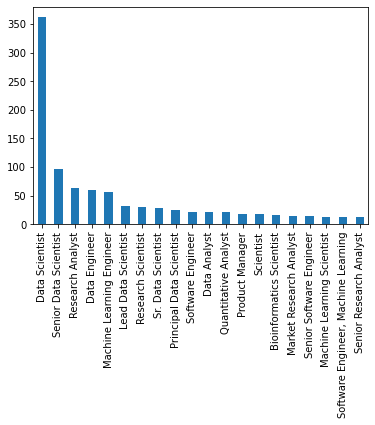

In [33]:
data['position'].value_counts().head(20).plot.bar()

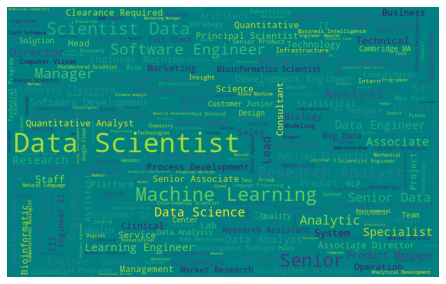

In [34]:
positions_text = " ".join(data['position'].dropna().to_list())
wordcloud = WordCloud( width = 800,height=500,max_font_size=50, max_words=300, background_color="teal").generate(positions_text)
  
# plot the WordCloud image    
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<AxesSubplot:>

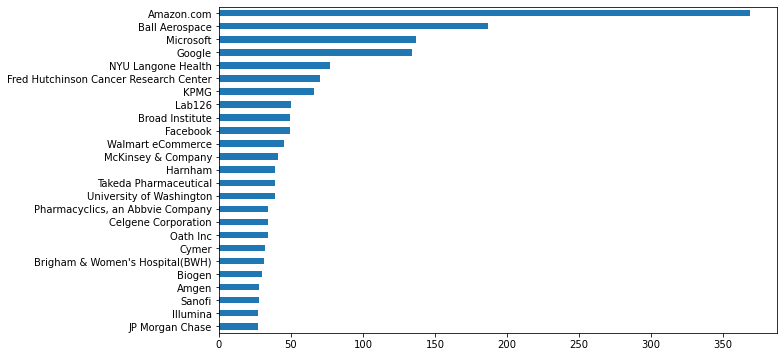

In [35]:
data['company'].value_counts().head(25).sort_values().plot.barh(figsize = (10,6))

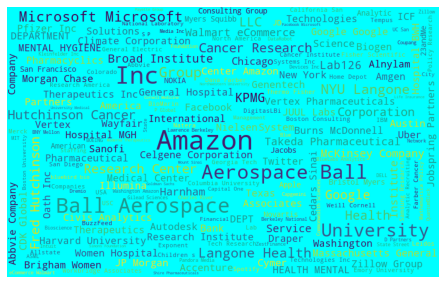

In [36]:
positions_text = " ".join(data['company'].dropna().to_list())
wordcloud = WordCloud(width = 800,height=500,max_font_size=50, max_words=200, background_color="aqua").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [37]:
import seaborn as sns

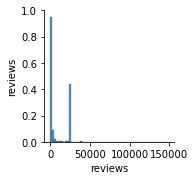

In [38]:
sns.pairplot(data)

In [39]:
description = data['position']

In [40]:
description[0]

'Development Director'

## CREATING JOB CLASSIFIER

In [41]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 5)
#random_state acts as the seed for the random number generator during the split

In [42]:
x_train.shape

(5571, 3)

In [43]:
#there are so many job profiles in the given dataset so lets Categories them into 5; Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data2 = data.copy()
data2.dropna(subset=['position'], how='all', inplace = True)
data2['position']=[x.upper() for x in data2['position']]
data2['description']=[x.upper() for x in data2['description']]

data2.loc[data2.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data2.loc[data2.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data2.loc[data2.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data2.loc[data2.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data2.loc[data2.position.str.contains('MANAGER'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data2.position=data2[(data2.position == 'Data Scientist') | (data2.position == 'Data Analyst') | (data2.position == 'Machine Learning Engineer') | (data2.position == 'Data Science Manager')]
data2.position=['Others' if x is np.nan else x for x in data2.position]

position=data2.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', position)

Here is  the count of each new roles we created : 

                     position  company
2             Data Scientist     2656
3  Machine Learning Engineer     1384
4                     Others     1295
0               Data Analyst      848
1       Data Science Manager      781


In [45]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [46]:
# Next Part in ML Algorithm is Data Cleaning
X=data2.description
Y=data2.position


X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)



x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [47]:
x_train

<4874x36027 sparse matrix of type '<class 'numpy.float64'>'
	with 1360285 stored elements in Compressed Sparse Row format>

In [48]:
#exporting the tfidf encoder
pickle.dump(tfidf, open("tfidf1.pkl", "wb"))


#exporting the label encoder
pickle.dump(label_enc, open('Departure_encoder.pkl', 'wb'))

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
from sklearn.linear_model import SGDClassifier

In [51]:
#3rd Classifier SGDC
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))

#crossfold Validation of 7 folds for SGD
cross_val_SGD=sklearn.model_selection.cross_validate(sgd, x_train, y=y_train,cv=7)

print ('SGD Train fit score is : ', '\n\n', cross_val_SGD ['fit_time'])
print ('SGD TEST score is : ', '\n\n', cross_val_SGD ['test_score'])

Accuracy of SGD : 0.7665071770334928
Confusion Matrix of SGD :  

 [[191   5  28  13  18]
 [ 10 125  45  12  42]
 [ 18   9 713  26  31]
 [  9   5  40 345  16]
 [ 11  32  84  34 228]]
SGD Train fit score is :  

 [0.45453691 0.42457128 0.44494319 0.46628714 0.44432163 0.4117651
 0.4464705 ]
SGD TEST score is :  

 [0.7517934  0.7517934  0.79885057 0.77729885 0.76293103 0.81034483
 0.79454023]


In [52]:
y_test

array([1, 2, 2, ..., 4, 4, 1])

In [53]:
sgd_pred =sgd.predict(x_test)
sgd_pred

array([3, 2, 2, ..., 4, 2, 1])

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,sgd_pred)

0.2888056844770227

In [55]:
with open('clf.pkl', 'wb') as f:
    pickle.dump(sgd, f)

In [56]:
!pip install ibm_watson_machine_learning

In [57]:
from ibm_watson_machine_learning import APIClient 
import json 
import numpy as np

In [58]:
from ibm_watson_machine_learning import APIClient 
wml_credentials = { 
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"70P_iZXw7hcjwJiKxgM2YSu0cgVDFh3wr3LwlwRnrsBc"
                  }
client = APIClient(wml_credentials)

In [59]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details() 
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [60]:
space_uid = guid_from_space_name(client, 'modelspace')
print("Space UID - " + space_uid)

Space UID - b3eb6b7e-18af-45e7-9e22-611c11433e3c


In [61]:
client.set.default_space(space_uid)

'SUCCESS'

In [62]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [63]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8") 
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [64]:
#save model
model_details =client.repository.store_model(model =sgd,meta_props={ 
client.repository.ModelMetaNames.NAME: 'skills_analysis',
client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid }
                                            )
model_id=client.repository.get_model_uid(model_details)

In [65]:
model_id

'e0eddcd6-79f5-41c6-b2ec-839be5a31a86'

In [68]:
y_test

array([1, 2, 2, ..., 4, 4, 1])

In [69]:
sgd_pred =sgd.predict(x_test)
sgd_pred

array([3, 2, 2, ..., 4, 2, 1])

In [96]:
y_train

array([3, 4, 2, ..., 4, 4, 0])

In [105]:
sgd.predict(x_train)

array([3, 4, 2, ..., 4, 4, 4])